In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [42]:
url = "http://moss.stanford.edu/results/4/3958402826424"
res = requests.get(url)
dom = BeautifulSoup(res.text)

In [60]:
rows = dom.select('table tr')  #table
# print(rows)
row_data = []
for row in rows:
    data = row.select('td')
    if data:
        row_data.append([data[0].text.strip(), data[1].text.strip()])
row_data[:5]

[['./sample_dataset/2_SingleLL.py (84%)',
  './sample_dataset/4_SingleLL.py (91%)'],
 ['./sample_dataset/1_SingleLL.py (99%)',
  './sample_dataset/3_SingleLL.py (99%)'],
 ['./sample_dataset/3_SingleLL.py (92%)',
  './sample_dataset/5_SingleLL.py (93%)'],
 ['./sample_dataset/1_SingleLL.py (92%)',
  './sample_dataset/5_SingleLL.py (93%)'],
 ['./sample_dataset/8_SingleLL.py (80%)',
  './sample_dataset/9_SingleLL.py (79%)']]

In [ ]:
node_list = ['1', '2', '3', '4', '5']

In [3]:
G = nx.Graph()

In [4]:
G.add_nodes_from(node_list)

In [63]:
G.add_edge('1', '2', weight=0.5)
G.add_edge('2', '3', weight=0.1)
G.add_edge('1', '3', weight=0.4)
G.add_edge('4', '5', weight=0.9)
G.add_edge('3', '5', weight=0.5)


In [64]:
pos = nx.spring_layout(G, seed=0)

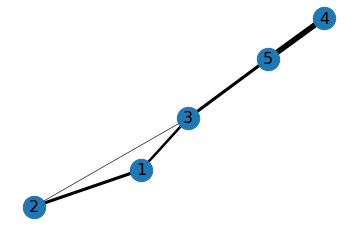

In [66]:
fig = plt.figure()

# draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# draw labels
labels = {}
for node_name in node_list:
    labels[str(node_name)] =str(node_name)
nx.draw_networkx_labels(G,pos,labels,font_size=16)

# determine edge weights
all_weights = []
for (node1,node2,data) in G.edges(data=True):
    all_weights.append(data['weight'])
unique_weights = list(set(all_weights))

# draw edge weights
scale = 3.0
for weight in unique_weights:
        weighted_edges = [(node1,node2) for (node1,node2,edge_attr) in G.edges(data=True) if edge_attr['weight']==weight]
        width = weight*len(node_list)*scale/sum(all_weights)
        nx.draw_networkx_edges(G,pos,edgelist=weighted_edges,width=width)

# draw edge labels
# edge_labels = nx.get_edge_attributes(G, "weight")
# nx.draw_networkx_edge_labels(G, pos, edge_labels)
fig.set_facecolor("white")
plt.axis('off')
# plt.title('')
# plt.savefig("test1.png") 
plt.show() 